In [2]:
import pandas as pd
import numpy as np

In [4]:
pd.__version__

'2.2.0'

In [33]:
df = pd.DataFrame(np.array([np.arange(0, 10, 1), np.arange(0, 20, 2)]).T, columns=['a', 'b'])

In [8]:
df

,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
5,5,10
6,6,12
7,7,14
8,8,16
9,9,18


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       10 non-null     int32
 1   b       10 non-null     int32
dtypes: int32(2)
memory usage: 212.0 bytes


In [10]:
df.describe()

,a,b
count,10.00000,10.000000
mean,4.50000,9.000000
std,3.02765,6.055301
min,0.00000,0.000000
25%,2.25000,4.500000
50%,4.50000,9.000000
75%,6.75000,13.500000
max,9.00000,18.000000


<Axes: >

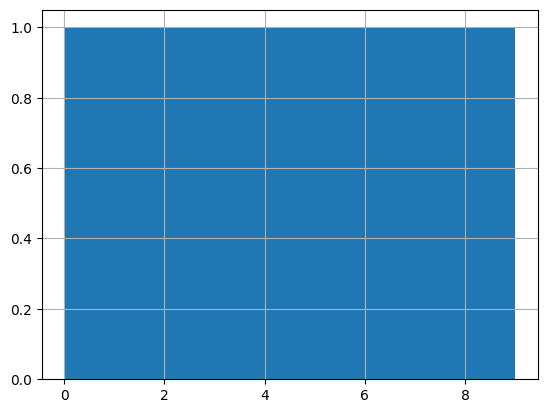

In [13]:
df['a'].hist()

<Axes: xlabel='a', ylabel='b'>

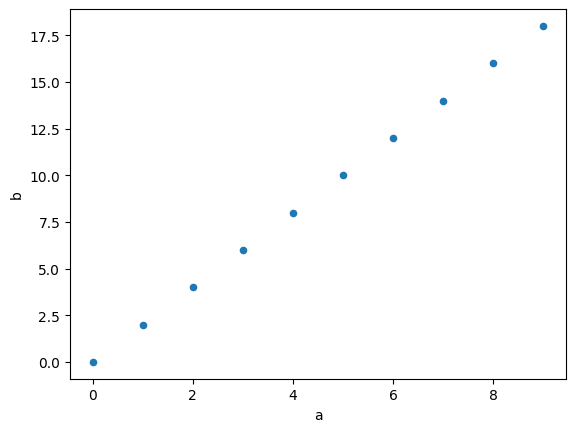

In [16]:
df.plot.scatter('a', 'b')

<Axes: >

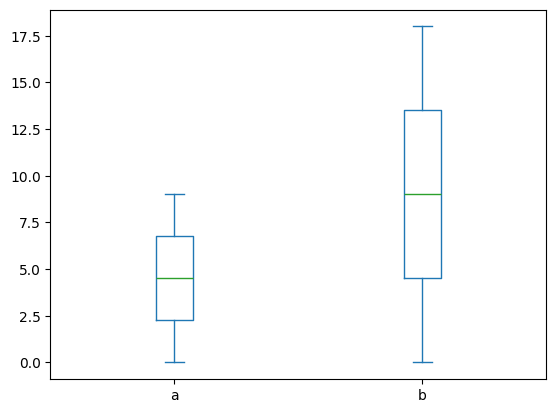

In [18]:
df.plot.box()

array([<Axes: ylabel='a'>, <Axes: ylabel='b'>], dtype=object)

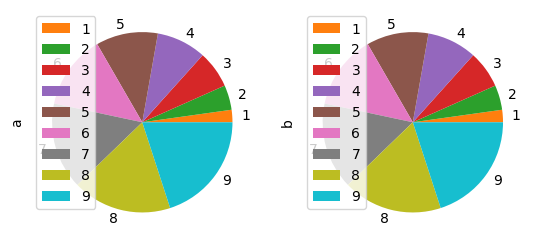

In [21]:
df.plot.pie(subplots=True)

In [23]:
def powwer(x):
    return x*x

In [24]:
df['a'].apply(powwer)

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
Name: a, dtype: int64

In [35]:
df.loc[7, 'a'] = 1

In [36]:
df

,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
5,5,10
6,6,12
7,1,14
8,8,16
9,9,18


In [37]:
df.iloc[1, 1] = 10

In [38]:
df

,a,b
0,0,0
1,1,10
2,2,4
3,3,6
4,4,8
5,5,10
6,6,12
7,1,14
8,8,16
9,9,18


# Regression Model

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder_sex = LabelEncoder()
encoder_sex.fit(df['sex'])

LabelEncoder()

In [7]:
encoder_sex.transform(df['sex'])

array([0, 1, 1, ..., 0, 0, 0])

In [8]:
encoder_sex.classes_

array(['female', 'male'], dtype=object)

In [9]:
df['sex'] = encoder_sex.transform(df['sex'])

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [11]:
encoder_smoker = LabelEncoder()
encoder_region = LabelEncoder()

In [12]:
df['smoker'] = encoder_smoker.fit_transform(df['smoker'])
df['region'] = encoder_region.fit_transform(df['region'])

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [15]:
X = df.drop('charges', axis=1)
y = df['charges']

In [16]:
X, y

(      age  sex     bmi  children  smoker  region
 0      19    0  27.900         0       1       3
 1      18    1  33.770         1       0       2
 2      28    1  33.000         3       0       2
 3      33    1  22.705         0       0       1
 4      32    1  28.880         0       0       1
 ...   ...  ...     ...       ...     ...     ...
 1333   50    1  30.970         3       0       1
 1334   18    0  31.920         0       0       0
 1335   18    0  36.850         0       0       2
 1336   21    0  25.800         0       0       3
 1337   61    0  29.070         0       1       1
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [17]:
# Scaling of X column
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [21]:
X

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


In [22]:
X.describe()

,age,sex,bmi,children,smoker,region
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-1.234687e-16,-2.124194e-16,-5.576008e-17,1.062097e-17,9.027823e-17
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-1.010519e+00,-2.412011e+00,-9.086137e-01,-5.074631e-01,-1.372326e+00
25%,-8.691547e-01,-1.010519e+00,-7.164063e-01,-9.086137e-01,-5.074631e-01,-4.669155e-01
50%,-1.474046e-02,9.895908e-01,-4.320880e-02,-7.876719e-02,-5.074631e-01,4.384945e-01
75%,8.396738e-01,9.895908e-01,6.611572e-01,7.510793e-01,-5.074631e-01,4.384945e-01
max,1.765289e+00,9.895908e-01,3.685522e+00,3.240619e+00,1.970587e+00,1.343905e+00


In [23]:
X.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

In [25]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [26]:
X_train.shape

(1311, 6)

In [29]:
# Creating our deep learning model
tf.random.set_seed(42)

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model_0.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.008),
    loss="mae",
    metrics=['mae']
)

history_0 = model_0.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
41/41 [==============================] - 1s 7ms/step - loss: 13216.1689 - mae: 13216.1689 - val_loss: 15330.5068 - val_mae: 15330.5068
Epoch 2/500
41/41 [==============================] - 0s 3ms/step - loss: 13192.6162 - mae: 13192.6162 - val_loss: 15285.0625 - val_mae: 15285.0625
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 13107.0479 - mae: 13107.0479 - val_loss: 15144.3682 - val_mae: 15144.3682
Epoch 4/500
41/41 [==============================] - 0s 3ms/step - loss: 12889.6504 - mae: 12889.6504 - val_loss: 14833.8145 - val_mae: 14833.8145
Epoch 5/500
41/41 [==============================] - 0s 2ms/step - loss: 12465.2803 - mae: 12465.2803 - val_loss: 14277.5625 - val_mae: 14277.5625
Epoch 6/500
41/41 [==============================] - 0s 2ms/step - loss: 11771.9795 - mae: 11771.9795 - val_loss: 13525.6514 - val_mae: 13525.6514
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - loss: 10876.1133 - mae: 10876.1133 - val_loss: 1267

<Axes: >

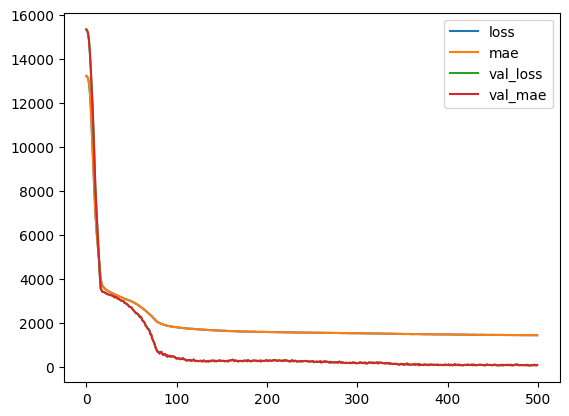

In [30]:
pd.DataFrame(history_0.history).plot()

In [31]:
y_pred = model_0.predict(X_test)

1/1 [==============================] - 0s 108ms/step


In [32]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_pred, y_test))

71.91100714285679


In [33]:
np.mean(y_test)

16045.35247142857

In [34]:
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                70        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model_0.save('insurance_model.keras')

In [39]:
from pickle import dump
dump(scaler, open('insurance_data_scaler.pkl', 'wb'))

In [41]:
dump(encoder_region, open('insurance_encoder_region.pkl', 'wb'))
dump(encoder_sex, open('insurance_encoder_sex.pkl', 'wb'))
fp = open('insurance_encoder_smoker.pkl', 'wb')
dump(encoder_smoker, fp)

In [1]:
from pickle import load
region_encoder = load(open("insurance_encoder_region.pkl", "rb"))